### Imports

In [4]:
import collections
import glob
import os

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.signal

### Examine Filenames

In [5]:
data_dir = '../data/'
filenames = [os.path.splitext(f)[0] for f in sorted(os.listdir(data_dir))]
fs = 256

In [6]:
len(filenames)

17

We have 17 files, but don't really know what's in them or how much data is in each file

In [7]:
filenames 

['s1_bike_0',
 's1_bike_1',
 's1_walk',
 's2_bike_0',
 's2_bike_1',
 's2_walk',
 's3_bike_0',
 's3_bike_1',
 's3_run',
 's3_walk',
 's4_run',
 's5_run',
 's6_run',
 's6_walk',
 's8_run',
 's8_walk',
 's9_walk']

Files are organized by subject_activity.  
Some subjects have two bike datasets  
First 2 subjects have no run  
S3 is the only one that has all 4 classes  
S4 and S5 only have run  
S6 and S8 don't have bike  
S9 only has walk  

Right away we learn that there is some imbalance in terms of number the representation of each class per subject. This is going to cause some trouble with leave-one-subject-out cross validation.

In [8]:
subjects_per_class = collections.defaultdict(set)
for f in filenames:
    subject = f.split('_')[0]
    activity = f.split('_')[1]
    subjects_per_class[activity].add(subject)

There's also some imbalance in terms of number of subjects per class. For the practicalities of ML, what matters more is imbalance in terms of number of samples per class. If that is unbalanced then our models could be biased towards the class that occurs more often in the training set. Fewer subjects, however, means that we will see less subject-induced variability in the training data.

In [9]:
{k: len(v) for k, v in subjects_per_class.items()}

{'bike': 3, 'walk': 6, 'run': 5}

### Load the data

In [10]:
data = []
for f in filenames:
    subject = f.split('_')[0]
    activity = f.split('_')[1]
    path = os.path.join(data_dir, f + '.csv')
    df = pd.read_csv(path)
    df = df.loc[: df.last_valid_index()]
    data.append((subject, activity, df))

In [11]:
df.head()

,accx,accy,accz
0,3.791152,-9.329793,1.622757
1,3.791152,-9.329285,1.646969
2,3.791366,-9.304383,1.695834
3,3.767274,-9.267029,1.732482
4,3.780279,-9.194481,1.770231


In [12]:
df.shape[0] / fs / 60

3.65

In [13]:
samples_per_class = collections.defaultdict(int)
for subject, activity, df in data:
    samples_per_class[activity] += len(df)

Plot the number of datapoints per class to get a better idea of the class imbalance.

In [14]:
%matplotlib inline

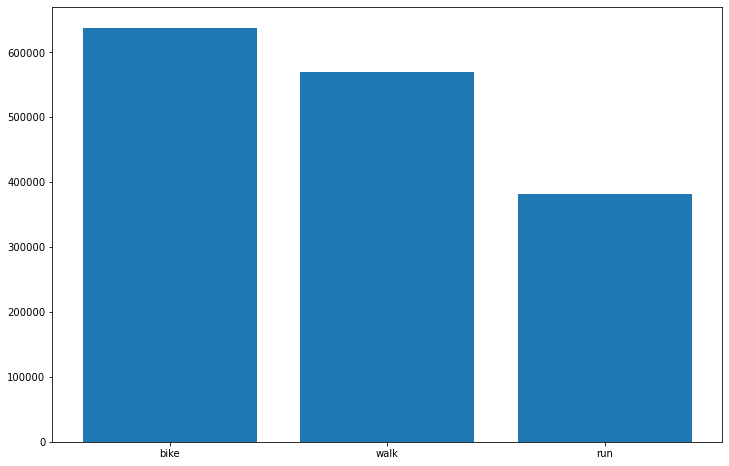

In [15]:
activity, n_samples = list(zip(*samples_per_class.items()))
plt.figure(figsize=(12, 8))
plt.bar(range(3), n_samples)
plt.xticks(range(3), activity);

## Plotting the Raw Data

In [16]:
%matplotlib auto


Using matplotlib backend: Qt5Agg


In [19]:
for subject, activity, df in sorted(data, key=lambda x: x[1]):
    ts = np.arange(len(df)) / fs
    plt.clf() 
    plt.plot(ts, df.accx, label='x')
    plt.plot(ts, df.accy, label='y')
    plt.plot(ts, df.accz, label='z')
    plt.title('{}_{}'.format(subject, activity))
    plt.legend()
    plt.ylim((-25, 25))
    plt.draw() 
    plt.show()
    plt.pause(.5)
    #while not plt.waitforbuttonpress(timeout=1):
    #    pass